### 문제정의
- 손글씨 숫자(0~9)를 분류하는 모델을 만들어보자
- 이미지 데이터의 형태를 이해해보자

### 데이터 수집

In [1]:
#판다스
import pandas as pd
#넘파이
import numpy as np
#시각화
import matplotlib.pyplot as plt

In [2]:
# 데이터 가져오기
data = pd.read_csv('data/digit_train.csv')

In [3]:
data.shape

(42000, 785)

In [4]:
data.head()
# label : 정답데이터
# pixel0~783 : 문제 28*28 이미지 데이터

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
# 데이터 시각화 -->이미지 데이터로 첫번째 행의 label 을 제외한 모든 컬럼 가져오기
img0 = data.iloc[0,1:]

In [7]:
img0.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
# 리스트 자료형을 28*28의 2차원으로 변환
img0_reshape=img0.values.reshape(28,28)

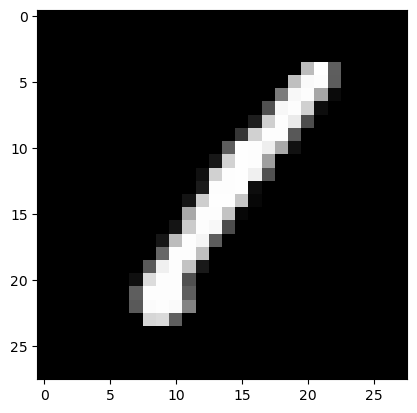

In [9]:
# img0 이미지 하나를 그려보기
plt.imshow(img0_reshape, cmap='gray')

In [10]:
img1 = data.iloc[7777,1:]

In [11]:
img1.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
img1_reshape=img1.values.reshape(28,28)

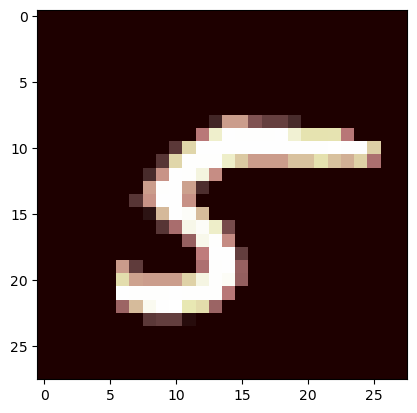

In [14]:
plt.imshow(img1_reshape, cmap='pink')
plt.show() #불필요한 텍스트 정보를 출력하지 않는 코드

### 학습을 위한 데이터 분리
- 학습 7 : 테스트 3
- random_state : 7

In [29]:
X = data.iloc[:,1:] #문제데이터
y = data.iloc[:,0] #정답데이터 data['label']

In [30]:
# 크기확인
X.shape, y.shape

((42000, 784), (42000,))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


### 모델선택
- KNN
- Logistic Regression
- SVM

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 모델생성
knn_model = KNeighborsClassifier()
logi_model = LogisticRegression()
svm_model = LinearSVC()

### 학습 및 평가

In [37]:
# 학습
knn_model.fit(X_train, y_train)
logi_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# 평가
print('KNN : ', knn_model.score(X_test, y_test))
print('Logistic : ', logi_model.score(X_test, y_test))
print('SVM : ', svm_model.score(X_test, y_test))

C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNN :  0.9645238095238096
Logistic :  0.9138095238095238
SVM :  0.8378571428571429


### 데이터 스케일링 적용
- 이미지 필셀정보 : 0~255로 최소/최대가 고정되어 있는 데이터
- MinMaxScaler를 사용하여 0~1 사이의 값으로 모든 픽셀을 조정
- 스케일링의 효과 확인하기
    - 학습(연산) 속도 개선
    - 거리기반으로 예측하는 KNN 모델 --> 거의 변화 없다.
- KNN 모델 : 모든 데이터에 대한 거리를 계산, 데이터가 많을수록 속도가 느려진다는 단점이 있다.

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler() # 0~1 사이로 변환

In [46]:
scaler.fit(X_train) # 현재 데이터 분포의 최소/최대 값 확인
                    # 변환하는 기준 값을 X_train 으로 추출

MinMaxScaler()

In [47]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# 문제 데이터에 스케일링 적용
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [51]:
# 스케일링이 적용된 데이터로 다시 학습
knn_model.fit(X_train_scale, y_train)
logi_model.fit(X_train_scale, y_train)
svm_model.fit(X_train_scale, y_train)

# 스케일링이 적용된 데이터로 변화값 확인
print('KNN : ', knn_model.score(X_test_scale, y_test))
print('Logistic : ', logi_model.score(X_test_scale, y_test))
print('SVM : ', svm_model.score(X_test_scale, y_test))

C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNN :  0.9644444444444444
Logistic :  0.9169047619047619
SVM :  0.9092857142857143


In [ ]:

# 회귀 : 정답이 연속적인 수치값, y햇이 예측한 값을 그대로 사용 
# 분류 : 정답이 딱 떨어지는 정해져 있는 값

# 선형분류 : y햇이라는 선형함수(결정경계)를 기준으로 결정경계의 위쪽에 있느냐,
#           아래쪽에 있느냐로 영역을 예측하는 것
#           가중치들의 합 > 0  ==> 1
#           가중치들의 합 < 0 ==> 0 

# Logistic Regression
# - 결정경계가 S자형 곡선으로 그려짐
# - Sigmoid(S자형 곡선)라는 선형함수를 사용
# - sigmoid는 입력값을 0 ~ 1범위로 변환, 확률값으로 사용
#    ex) 개와 고양이를 분류하는 모델 : 개(70%), 고양이(80%)  ==> 예측하는 확률값을 명시
#    sigmoid 함수(곡선)를 잘 그렸는지 확인하는 기준 ==> 교차엔트로피 오차함수
#    - 오차들을 더해서 오차가 크면 ==> 안 좋은 함수
#    - 오차들을 더해서 오차가 작으면 ==> 좋은 함수 

# 선형회귀 --> MSE, R2score(직선)
# 로지스틱회귀 --> 교차엔트로피 오차함수(곡선)
# SVM --> 마진 

# SVM
# - 결정경계(초평면)와 가장 인접한 데이터 : 서포트 벡터
# - 결정경계(초평면)와 서포트 벡터간의 거리 : 마진 
# - 마진이 가장 큰 결정경계가 가장 좋은 결정경계 
# - 결정경계(초평면)가 데이터(N)가 가지고 있는 차원(N-1)으로 구성함


### 평가지표
- 회귀 : 오차를 기반으로 하는 평가지표 사용(MSE, R2score)
- 분류 : 맞춘 갯수를 기반으로 평가지표를 사용
    1. 정확도(Accuracy) : 전체 데이터중에 정확히 맞춘 비율
    2. 재현율(Recall) : 실제 양성중에서 정확히 맞춘 비율
    3. 정밀도(Precision) : 예측 양성중에서 정확히 맞춘 비율
    4. F1-score : 정밀도와 재현율의 조화평균
- SVM : 초평면(결정경계)을 기준으로 소프트벡터의 마진(거리)이 클수록 좋은 결정경계

In [52]:
# 평가지표 라이브러리 불러오기
from sklearn.metrics import confusion_matrix

In [53]:
# 스케일링이 적용된 테스트데이터로 예측값 만들기
# 로지스틱분류 사용
pre=logi_model.predict(X_test_scale)

In [55]:
# confusion_matrix(실제값, 예측값)
test_conf=confusion_matrix(y_test, pre)
test_conf

array([[1207,    0,    4,    4,    3,   13,    6,    3,    7,    2],
       [   0, 1406,    7,    7,    1,    4,    1,    2,    8,    4],
       [   7,   11, 1112,   23,   15,    3,   11,   19,   22,    8],
       [   7,    2,   39, 1152,    1,   46,    1,   11,   28,   12],
       [   3,   18,   10,    2, 1140,    1,   13,   10,    9,   44],
       [  11,    7,   16,   41,   15,  936,   17,    7,   29,    9],
       [  13,    4,    8,    1,   16,   16, 1157,    1,    7,    2],
       [   1,   11,   13,    4,    7,    1,    2, 1216,    3,   48],
       [   9,   38,    8,   36,    9,   27,    6,    1, 1089,   24],
       [   8,    8,    2,   10,   36,    8,    0,   44,   11, 1138]],
      dtype=int64)

In [56]:
from sklearn.metrics import classification_report
# classification_report - 분류평가지표 4가지를 report 형태로 

In [58]:
# classification_report(실제값, 예측값)
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1249
           1       0.93      0.98      0.95      1440
           2       0.91      0.90      0.91      1231
           3       0.90      0.89      0.89      1299
           4       0.92      0.91      0.91      1250
           5       0.89      0.86      0.87      1088
           6       0.95      0.94      0.95      1225
           7       0.93      0.93      0.93      1306
           8       0.90      0.87      0.89      1247
           9       0.88      0.90      0.89      1265

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



- support : 데이터의 갯수
- accuracy : 로지스틱회귀 모델의 예측성능 92% 이지만, 각 숫자(클래스)가 나온 확률의 수치값은 다르다.
- f1-score : 정밀도와 재현율의 조화평균 --> 정밀도와 재현율을 고려한 수치값
    --> 수치가 높은 게 두 분류지표(정밀도, 재현율)도 높음을 알 수 있다.
- macro avg : 정밀도, 재현율, f1-score 를 구해서 각각 평균을 낸 것
    --> 분류모델이 각 클래스에 대해 얼마나 평균적으로 잘 동작하는지 알고 싶을때 사용
- weighted avg(가중평균) : 각 클래스의 중요도, 영향도(빈도) 등에 따라 가중치를 곱해서 구해지는 평균 

### 예측

In [61]:
# index 7 번째 데이터 가져오기
img7 = X_test_scale[7]

In [62]:
logi_model.predict([img7])

array([1], dtype=int64)

In [63]:
# 실제 정답 확인
y_test.iloc[7]

1

In [66]:
svm_model.predict([img7])

array([1], dtype=int64)

In [67]:
logi_model.predict_proba(X_test_scale[7:8]) # 7번째 값(0~9) 숫자가 1일 확률
# svm 은 predict_proba 없음

array([[3.73323833e-10, 9.88049149e-01, 2.75926406e-04, 3.35151433e-03,
        2.15892443e-06, 7.28083512e-05, 1.06545842e-05, 6.20899060e-03,
        1.35662821e-04, 1.89313425e-03]])

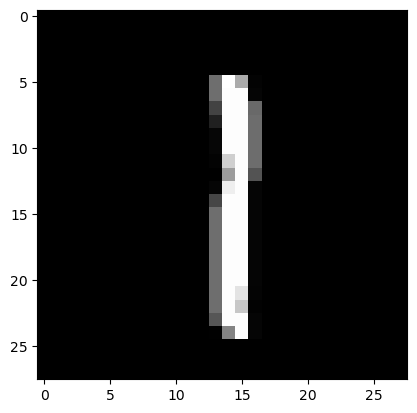

In [72]:
img7 = X_test.iloc[7]
plt.imshow(img7.values.reshape(28,28), cmap='gray')

- 낮은 재현율 높은 정밀도 : 모델이 한번 예측할 때마다 비용이 많이 들 경우 적합
    ==> 의약실험, 모델이 예측의 리스크/비용이 큰 경우, 아이에게 유익한 영상만 보여주고 싶을 때
- 높은 재현율 낮은 정밀도 : 실제 사건(상황)에 대한 리스크가 큰 경우 적합
    ==> 감시카메라를 이용해 좀도둑을 걸러내는 상황, 암환자 판정, 스팸문자
- 같은 정확도일때 애매한 것들을 사용하지 않겠다 ==> 높은 정밀도
- 같은 정확도일때 애매한 것들을 사용하겠다 ==> 높은 재현율
* 상황에 맞게 평가지표를 적용
- best : 높은 재현율, 높은 정밀도

- ROC 곡선
    : 임계값을 0 ~ 1 까지 변화시켜가면서 x 축 : 가짜양성비율(FPR), y축 : 진짜양성비율(TPR)을 표시한 곡선
    : 임계값 변화에 따라 양성/음성 분류가 달라짐, ROC 곡선도 달라짐
    : ROC 곡선 아래 면적 - AUC(Area Under Curve)
    : AUC의 값이 1에 가까울수록 분류모델의 성느이 좋다고 평가
    : 0.5를 기준으로 위쪽으로 갈수록 좋다.